# Sentiment Analysis: Logistic Regression
Welcome to this GitHub Repo! 
I will be implementing logistic regression for sentiment analysis on tweets. Given a tweet, I will decide if it has a positive sentiment or a negative one. I will be using a data set of tweets.

The main features of this project are:

* Extract features for logistic regression given some text
* Implement logistic regression from scratch
* Apply logistic regression on a natural language processing task
* Test using the trained logistic regression model
* Perform error analysis



The Dataset is taken from [here](https://www.nltk.org/howto/twitter.html)

Information about the Tweets Dataset:
* The `twitter_samples` contains subsets of 5,000 positive tweets, 5,000 negative tweets, and the full set of 10,000 tweets.
* We will perform 80-20 train-test split on this dataset to have 8000 tweets in the training set and 2000 tweets in the test set.

## Import Libraries and Helper Functions

In [58]:
import nltk
from os import getcwd

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

import numpy as np
import pandas as pd
from nltk.corpus import twitter_samples 
from utils import process_tweet, build_freqs

#### Information about Helper Functions
* `process_tweet()`: cleans the text, tokenizes it into separate words, removes stopwords, and converts words to stems.
* `build_freqs()`: this counts how often a word in the 'corpus' (the entire set of tweets) was associated with a positive label '1' or a negative label '0', then builds the `freqs` dictionary, where each key is a (word,label) tuple, and the value is the count of its frequency within the corpus of tweets.

In [2]:
# add folder, tmp2, from our local workspace containing pre-downloaded corpora files to nltk's data path
# this enables importing of these files without downloading it again when we refresh our workspace

filePath = f"{getcwd()}/../tmp2/"
nltk.data.path.append(filePath)

## Data Preparation

In [3]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

# split the data into two pieces, one for training and one for testing (validation set) 
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg 
test_x = test_pos + test_neg

# combine positive and negative labels
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

In [4]:
# Print the shape train and test sets
print("train_y.shape = " + str(train_y.shape))
print("test_y.shape = " + str(test_y.shape))

train_y.shape = (8000, 1)
test_y.shape = (2000, 1)


In [5]:
# accessing the helper function and creating frequency dictionary
freqs = build_freqs(train_x, train_y) # taken from utils.py

# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 11337


## Logistic regression 

### Step 1: Sigmoid Function

* The sigmoid function is defined as: 

$$ h(z) = \frac{1}{1+\exp^{-z}} 

In [23]:
# UNQ_C1 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def sigmoid(z): 
    '''
    Input:
        z: is the input (can be a scalar or an array)
    Output:
        h: the sigmoid of z
    '''
    return 1/(1+np.exp(-z))

### Step 2: Cost function and Gradient

The cost function used for logistic regression is the average of the log loss across all training examples:

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^m y^{(i)}\log (h(z(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(z(\theta)^{(i)})) $$

The loss function for a single training example is:
$$ Loss = -1 \times \left( y^{(i)}\log (h(z(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(z(\theta)^{(i)})) \right)$$


#### Weight Update Equations

Equation 1:

$$\nabla_{\theta_j}J(\theta) = \frac{1}{m} \sum_{i=1}^m(h^{(i)}-y^{(i)})x_j $$

Equation: 2

$$\theta_j = \theta_j - \alpha \times \nabla_{\theta_j}J(\theta) $$


In [45]:
def gradientDescent(x, y, theta, alpha, num_iters):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        J: the final cost
        J_history: Cost History
        theta: your final weight vector
    Hint: you might want to print the cost to make sure that it is going down.
    '''
    # get the number of rows in matrix x
    m = x.shape[0]
    J_history = []

    for i in range(0, num_iters):
        
        # get z, the dot product of x and theta
        z = np.dot(x, theta)
        
        # get the sigmoid of z
        h = sigmoid(z)
        
        # calculate the cost function
        J = -1./m*(np.dot(y.transpose(), np.log(h)) + np.dot((1-y).transpose(), np.log(1-h)))

        # Append the current cost to the history
        J_history.append(float(J))

        # update the weights theta
        theta = theta - (alpha / m) * (np.dot(x.transpose(), (h-y)))
        
    J = float(J)
    return J, J_history, theta

In [47]:
# Check the function

# Construct a synthetic test case 
np.random.seed(1)
tmp_X = np.append(np.ones((10, 1)), np.random.rand(10, 2) * 2000, axis=1)
tmp_Y = (np.random.rand(10, 1) > 0.35).astype(float)

# Apply gradient descent
tmp_J, _, tmp_theta = gradientDescent(tmp_X, tmp_Y, np.zeros((3, 1)), 1e-8, 700)
print(f"The cost after training is {tmp_J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(tmp_theta)]}")

The cost after training is 0.67094970.
The resulting vector of weights is [np.float64(4.1e-07), np.float64(0.00035658), np.float64(7.309e-05)]


C:\Users\Ehtishaam\AppData\Local\Temp\ipykernel_1360\3957939760.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J_history.append(float(J))
C:\Users\Ehtishaam\AppData\Local\Temp\ipykernel_1360\3957939760.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J = float(J)


## Feature Extraction

In [48]:
def extract_features(tweet, freqs):
    '''
    Input: 
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output: 
        x: a feature vector of dimension (1,3)
    '''
    # tokenize, stem, and remove stopwords from a tweet
    word_l = process_tweet(tweet)
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1 
    
    
    # loop through each word in the list of words
    for word in word_l:
        
        # increment the word count for the positive label 1
        x[0,1] += freqs.get((word, 1.0), 0)
        
        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word, 0.0), 0)
        
    assert(x.shape == (1, 3))
    return x

In [49]:
# Check your function

tmp1 = extract_features(train_x[0], freqs)
print(f'The tweet: \n{train_x[0]} \nwas in the Dataset')
print(tmp1)

print('\n')

tweet_checking = 'blorb bleeeeb bloooob'
tmp2 = extract_features(tweet_checking, freqs)
print(f'The tweet: \n{tweet_checking} \nwas NOT in the Dataset')
print(tmp2)

The tweet: 
#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :) 
was in the Dataset
[[1.00e+00 3.02e+03 6.10e+01]]


The tweet: 
blorb bleeeeb bloooob 
was NOT in the Dataset
[[1. 0. 0.]]


## Model Training

C:\Users\Ehtishaam\AppData\Local\Temp\ipykernel_1360\3957939760.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J_history.append(float(J))


The cost after training is 0.24215478.
The resulting vector of weights is [np.float64(7e-08), np.float64(0.00052391), np.float64(-0.00055517)]


C:\Users\Ehtishaam\AppData\Local\Temp\ipykernel_1360\3957939760.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J = float(J)


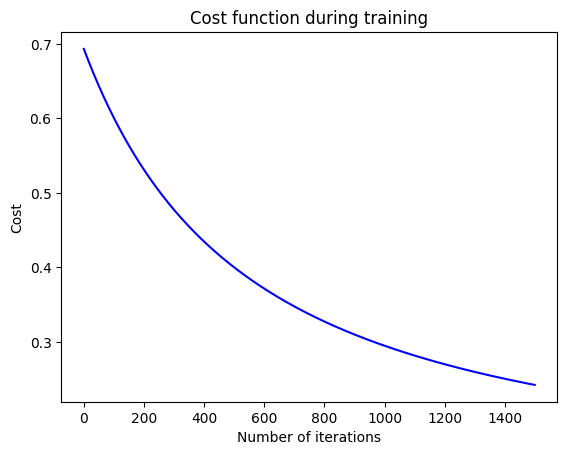

In [81]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

# training labels corresponding to X
Y = train_y

# Apply gradient descent with 1500 iterations and learning rate = 1e-9
J, J_history, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

# Plot the cost function over iterations
plt.plot(range(len(J_history)), J_history, color='blue')
plt.title('Cost function during training')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.show()

## Step 4: Model Testing

It is time to test the trained logistic regression model on some new unseen input. 


In [94]:
def predict_tweet(tweet, freqs, theta):
    '''
    Input: 
        tweet: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output: 
        y_pred: the probability of a tweet being positive or negative
    '''
    
    # extract the features of the tweet and store it into x
    x = extract_features(tweet, freqs)
    
    # make the prediction using x and theta
    y_pred = sigmoid(np.dot(x,theta))
    
    
    return y_pred

In [101]:
# Before checking with test set, write your own tweets to check 

for tweet in ['I am happy', 'I am bad', 'this movie should have been great.', 'i wish the movie could have been better', 'rain makes me sad', ':(']:
    print( '%s -> %f' % (tweet, predict_tweet(tweet, freqs, theta)))

I am happy -> 0.518581
I am bad -> 0.494339
this movie should have been great. -> 0.515331
i wish the movie could have been better -> 0.492055
rain makes me sad -> 0.480692
:( -> 0.115773


C:\Users\Ehtishaam\AppData\Local\Temp\ipykernel_1360\189191181.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print( '%s -> %f' % (tweet, predict_tweet(tweet, freqs, theta)))


## Checking Performance on Test Set


In [102]:
def test_logistic_regression(test_x, test_y, freqs, theta):
    """
    Input: 
        test_x: a list of tweets
        test_y: (m, 1) vector with the corresponding labels for the list of tweets
        freqs: a dictionary with the frequency of each pair (or tuple)
        theta: weight vector of dimension (3, 1)
    Output: 
        accuracy: (# of tweets classified correctly) / (total # of tweets)
    """
    
    
    # the list for storing predictions
    y_hat = []
    
    for tweet in test_x:
        # get the label prediction for the tweet
        y_pred = predict_tweet(tweet, freqs, theta)
        
        if y_pred > 0.5:
            # append 1.0 to the list
            y_hat.append(1.0)
        else:
            # append 0 to the list
            y_hat.append(0.0)

    # With the above implementation, y_hat is a list, but test_y is (m,1) array
    # convert both to one-dimensional arrays in order to compare them using the '==' operator
    accuracy = (y_hat == test_y.flatten()).sum() / len(test_x)

    
    return accuracy

In [103]:
tmp_accuracy = test_logistic_regression(test_x, test_y, freqs, theta)
print(f"Logistic regression model's accuracy = {tmp_accuracy * 100:.2f} %")

Logistic regression model's accuracy = 99.50 %


## Step 5: Error Analysis

We will filter out the misclassified tweets

In [106]:
print('Label Predicted Tweet')
print('\n')
for x,y in zip(test_x,test_y):
    y_hat = predict_tweet(x, freqs, theta)

    if np.abs(y - (y_hat > 0.5)) > 0:
        print('THE TWEET IS:', x)
        print('\n')
        print('THE PROCESSED TWEET IS:', process_tweet(x))
        print('\n')
        print('%d\t%0.8f\t%s' % (y, y_hat, ' '.join(process_tweet(x)).encode('ascii', 'ignore')))

Label Predicted Tweet


THE TWEET IS: @jaredNOTsubway @iluvmariah @Bravotv Then that truly is a LATERAL move! Now, we all know the Queen Bee is UPWARD BOUND : ) #MovingOnUp


THE PROCESSED TWEET IS: ['truli', 'later', 'move', 'know', 'queen', 'bee', 'upward', 'bound', 'movingonup']


1	0.49996920	b'truli later move know queen bee upward bound movingonup'
THE TWEET IS: @MarkBreech Not sure it would be good thing 4 my bottom daring 2 say 2 Miss B but Im gonna be so stubborn on mouth soaping ! #NotHavingit :p


THE PROCESSED TWEET IS: ['sure', 'would', 'good', 'thing', '4', 'bottom', 'dare', '2', 'say', '2', 'miss', 'b', 'im', 'gonna', 'stubborn', 'mouth', 'soap', 'nothavingit', ':p']


1	0.48663815	b'sure would good thing 4 bottom dare 2 say 2 miss b im gonna stubborn mouth soap nothavingit :p'
THE TWEET IS: I'm playing Brain Dots : ) #BrainDots
http://t.co/UGQzOx0huu


THE PROCESSED TWEET IS: ["i'm", 'play', 'brain', 'dot', 'braindot']


1	0.48370697	b"i'm play brain dot braindot"
THE T

C:\Users\Ehtishaam\AppData\Local\Temp\ipykernel_1360\2899485514.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%d\t%0.8f\t%s' % (y, y_hat, ' '.join(process_tweet(x)).encode('ascii', 'ignore')))


THE TWEET IS: I'm playing Brain Dots : ) #BrainDots http://t.co/R2JBO8iNww http://t.co/ow5BBwdEMY


THE PROCESSED TWEET IS: ["i'm", 'play', 'brain', 'dot', 'braindot']


1	0.48370697	b"i'm play brain dot braindot"
THE TWEET IS: off to the park to get some sunlight : )


THE PROCESSED TWEET IS: ['park', 'get', 'sunlight']


1	0.49578796	b'park get sunlight'
THE TWEET IS: @msarosh Uff Itna Miss karhy thy ap :p


THE PROCESSED TWEET IS: ['uff', 'itna', 'miss', 'karhi', 'thi', 'ap', ':p']


1	0.48212905	b'uff itna miss karhi thi ap :p'
THE TWEET IS: @phenomyoutube u probs had more fun with david than me : (


THE PROCESSED TWEET IS: ['u', 'prob', 'fun', 'david']


0	0.50020391	b'u prob fun david'
THE TWEET IS: pats jay : (


THE PROCESSED TWEET IS: ['pat', 'jay']


0	0.50039295	b'pat jay'
THE TWEET IS: my beloved grandmother : ( https://t.co/wt4oXq5xCf


THE PROCESSED TWEET IS: ['belov', 'grandmoth']


0	0.50000002	b'belov grandmoth'


Later in this specialization, we will see how we can use deep learning to improve the prediction performance.

## Step 6: Try Your Own Tweets :)

In [107]:
# Feel free to change the tweet below
my_tweet = 'This is a ridiculously bright movie. The plot was terrible and I was sad until the ending!'

print(process_tweet(my_tweet))
y_hat = predict_tweet(my_tweet, freqs, theta)
print(y_hat)
if y_hat > 0.5:
    print('Positive sentiment')
else: 
    print('Negative sentiment')

['ridicul', 'bright', 'movi', 'plot', 'terribl', 'sad', 'end']
[[0.48139084]]
Negative sentiment


#### THIS IS THE END OF THIS PROJECT CODE